In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Connect Colab environment wit drive to fetch the file

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# import file from Drive

In [3]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1do1D1qLc87gzUJdSDxYteTXr51BCR4e8'}) # replace the id with id of file you want to access
downloaded.GetContentFile('all_combined.csv')

In [4]:
import pandas as pd

df=pd.read_csv('all_combined.csv')

# import file from drive and store as df

In [5]:
df.head()

,reviewId,content,score,app
0,9d0ad59e-6733-4703-98b6-9a77f513f892,Love you insta,5,Facebook
1,515b093c-f4af-447c-8435-2da7532f32f2,A bit good,4,Facebook
2,bab305e7-6163-4782-92d4-b3bbdacd5c69,Wish it wouldn't be all adds and stuff. Want m...,2,Facebook
3,163ad8f7-11de-4bfe-84be-5d8ee098f5ed,Super,5,Facebook
4,0131ecd0-d913-43ac-96af-52e006985240,Not Impressed,3,Facebook


In [6]:
data = df.sample(4000, random_state=1).copy()
data


,reviewId,content,score,app
49673,1577e58f-dcf6-4a2d-acae-0c98ca9f449d,I love this app,5,TikTok
171551,8b55d410-6638-44a4-9193-a8fc6156e935,Love you insta 🌹🌹🌹🌹🌹🌹🙏.,5,Dropbox
5506,fbb2e543-2f7b-43ac-b46e-ad597459b4f5,Good,5,Facebook
38370,b331b7f4-0a60-4461-93b5-6c3464aa273f,Nice,5,Instagram
36930,dcd5bafa-9e77-43b3-96e0-75135df80afc,This new Instagram has the worst user experien...,1,Instagram
...,...,...,...,...
82981,829bf572-3fde-42c7-9dc9-4d22720df417,Nice,5,Microsoft PowerPoint
173392,6b73f8d2-872b-42ab-af91-c8201baa23df,i love this app,5,Dropbox
79342,eef72485-8d64-4eba-8895-2296bfc2981d,हम आपका एक इंस्टाग्राम हमारे फोन में डाउनलोड न...,5,Microsoft Word
43612,4b6427ea-cd48-458c-917e-aa01d5792901,I can't use this app because swipe reply not w...,1,TikTok


# Drop not required Column

In [7]:
data=data.drop(['app','reviewId'],axis=1)

In [8]:
data.head()

,content,score
49673,I love this app,5
171551,Love you insta 🌹🌹🌹🌹🌹🌹🙏.,5
5506,Good,5
38370,Nice,5
36930,This new Instagram has the worst user experien...,1


# Import NLTK library to preprocess text

In [9]:
import nltk

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Import Stop Words from NLTK

In [11]:
from nltk.corpus import stopwords

In [12]:
st = stopwords.words('english')
st.append("and")

# Import Punctuation from string

In [13]:
import string
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()

# remove stop words and punctuation from from text

In [16]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed

In [17]:
data.content = data.content.astype('object')

In [18]:
data['cleaned_content'] = data['content'].apply(message_cleaning)

# Import Spacy Library to preprocess text

In [19]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
nlp = English()

remove stop words from text with spacy Library

In [20]:
def spacy_text_filter(text):
    my_doc = nlp(text)
    
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
        
    filtered_sentence =[] 
    
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    return ' '.join(filtered_sentence)

In [21]:
 data['cleaned_content1'] = data['cleaned_content'].apply(lambda x: spacy_text_filter(x))


Remove Stop words from Gensim library

In [22]:
from gensim.parsing.preprocessing import remove_stopwords

In [23]:
data['cleaned_content2'] = data['cleaned_content1'].apply(lambda x: remove_stopwords(x))

# Import Lemitizer drom spacy 

In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_text_lemmitizer(text):
    my_doc = nlp(text)
    
    
        
    filtered_sentence =[] 
    
    for word in my_doc:
        
        filtered_sentence.append(word.lemma_) 
    return ' '.join(filtered_sentence)

In [25]:
data['cleaned_content3'] = data['cleaned_content2'].apply(lambda x: spacy_text_lemmitizer(x))

In [26]:
data.head()

,content,score,cleaned_content,cleaned_content1,cleaned_content2,cleaned_content3
49673,I love this app,5,love app,love app,love app,love app
171551,Love you insta 🌹🌹🌹🌹🌹🌹🙏.,5,Love insta 🌹🌹🌹🌹🌹🌹🙏,Love insta 🌹 🌹 🌹 🌹 🌹 🌹 🙏,Love insta 🌹 🌹 🌹 🌹 🌹 🌹 🙏,love insta 🌹 🌹 🌹 🌹 🌹 🌹 🙏
5506,Good,5,Good,Good,Good,good
38370,Nice,5,Nice,Nice,Nice,nice
36930,This new Instagram has the worst user experien...,1,new Instagram worst user experience Ive ever P...,new Instagram worst user experience ve Putting...,new Instagram worst user experience ve Putting...,new Instagram bad user experience ve put sugge...


# Remove not required columns from dataset

In [27]:
data=data.drop(['content','cleaned_content','cleaned_content1','cleaned_content2'],axis=1)

In [28]:
data.head()

,score,cleaned_content3
49673,5,love app
171551,5,love insta 🌹 🌹 🌹 🌹 🌹 🌹 🙏
5506,5,good
38370,5,nice
36930,1,new Instagram bad user experience ve put sugge...


store text column into list

In [29]:
data1 = data['cleaned_content3'].tolist()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 49673 to 40031
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   score             4000 non-null   int64 
 1   cleaned_content3  4000 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.8+ KB


# Initialise the Input 

- convert text into BAG OF WORDS with Countvectorizer

In [31]:
app_review_countvectorizer = CountVectorizer().fit_transform(data1).toarray()

In [32]:
app_review_countvectorizer.shape

(4000, 3505)

In [33]:
X = app_review_countvectorizer
y = data['score']

In [34]:
X.shape

(4000, 3505)

In [35]:
y.shape

(4000,)

# divide train and test data using SKLEARN

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

USE Naive Bayes model to train model for Sentiment analysis

In [ ]:
from sklearn.naive_bayes import MultinomialNB #for discrete values

In [ ]:
NB_classifier = MultinomialNB()

In [ ]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = NB_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Print confusion matrix for for Naive bayes model prediction to check accuracy of model

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 301,    5,    2,   10,  128],
       [  53,    0,    2,    2,   32],
       [  33,    1,    2,    1,   54],
       [  29,    0,    2,    2,  134],
       [  73,    3,    1,   12, 1118]])

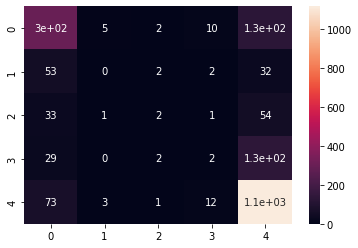

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

0.7115

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.67      0.64       446
           2       0.00      0.00      0.00        89
           3       0.22      0.02      0.04        91
           4       0.07      0.01      0.02       167
           5       0.76      0.93      0.84      1207

    accuracy                           0.71      2000
   macro avg       0.33      0.33      0.31      2000
weighted avg       0.61      0.71      0.65      2000



# Import Logistic regression model for classification 

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 256,   20,    2,    4,  164],
       [  33,    2,    4,    3,   47],
       [  20,    4,    4,    3,   60],
       [  14,    1,    3,    5,  144],
       [  48,    4,    5,    0, 1150]])

In [ ]:
from sklearn.metrics import accuracy_score
print('Test set accuracy score',accuracy_score(y_test,y_pred_test))
print('Traning set accuracy score',accuracy_score(y_train,y_pred_train))

Test set accuracy score 0.7085
Traning set accuracy score 0.81725


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.69      0.57      0.63       446
           2       0.06      0.02      0.03        89
           3       0.22      0.04      0.07        91
           4       0.33      0.03      0.05       167
           5       0.73      0.95      0.83      1207

    accuracy                           0.71      2000
   macro avg       0.41      0.32      0.32      2000
weighted avg       0.64      0.71      0.65      2000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.728625
Testing Accuracy  :  0.6555


# Import KNN classifier model for classifictaion

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)

y_pred_train=classifier.predict(X_train)
y_pred_test=classifier.predict(X_test)


print('Training accuracy',accuracy_score(y_train,y_pred_train))
print('Testing ACcuracy accuracy',accuracy_score(y_test,y_pred_test))

Training accuracy 0.816375
Training accuracy 0.5465


# Elbow method to check correct number of Neighbours

In [ ]:
acc_train=[]
acc_test=[]
for i in range(1,16):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)

    y_pred_train=classifier.predict(X_train)
    y_pred_test=classifier.predict(X_test)


    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

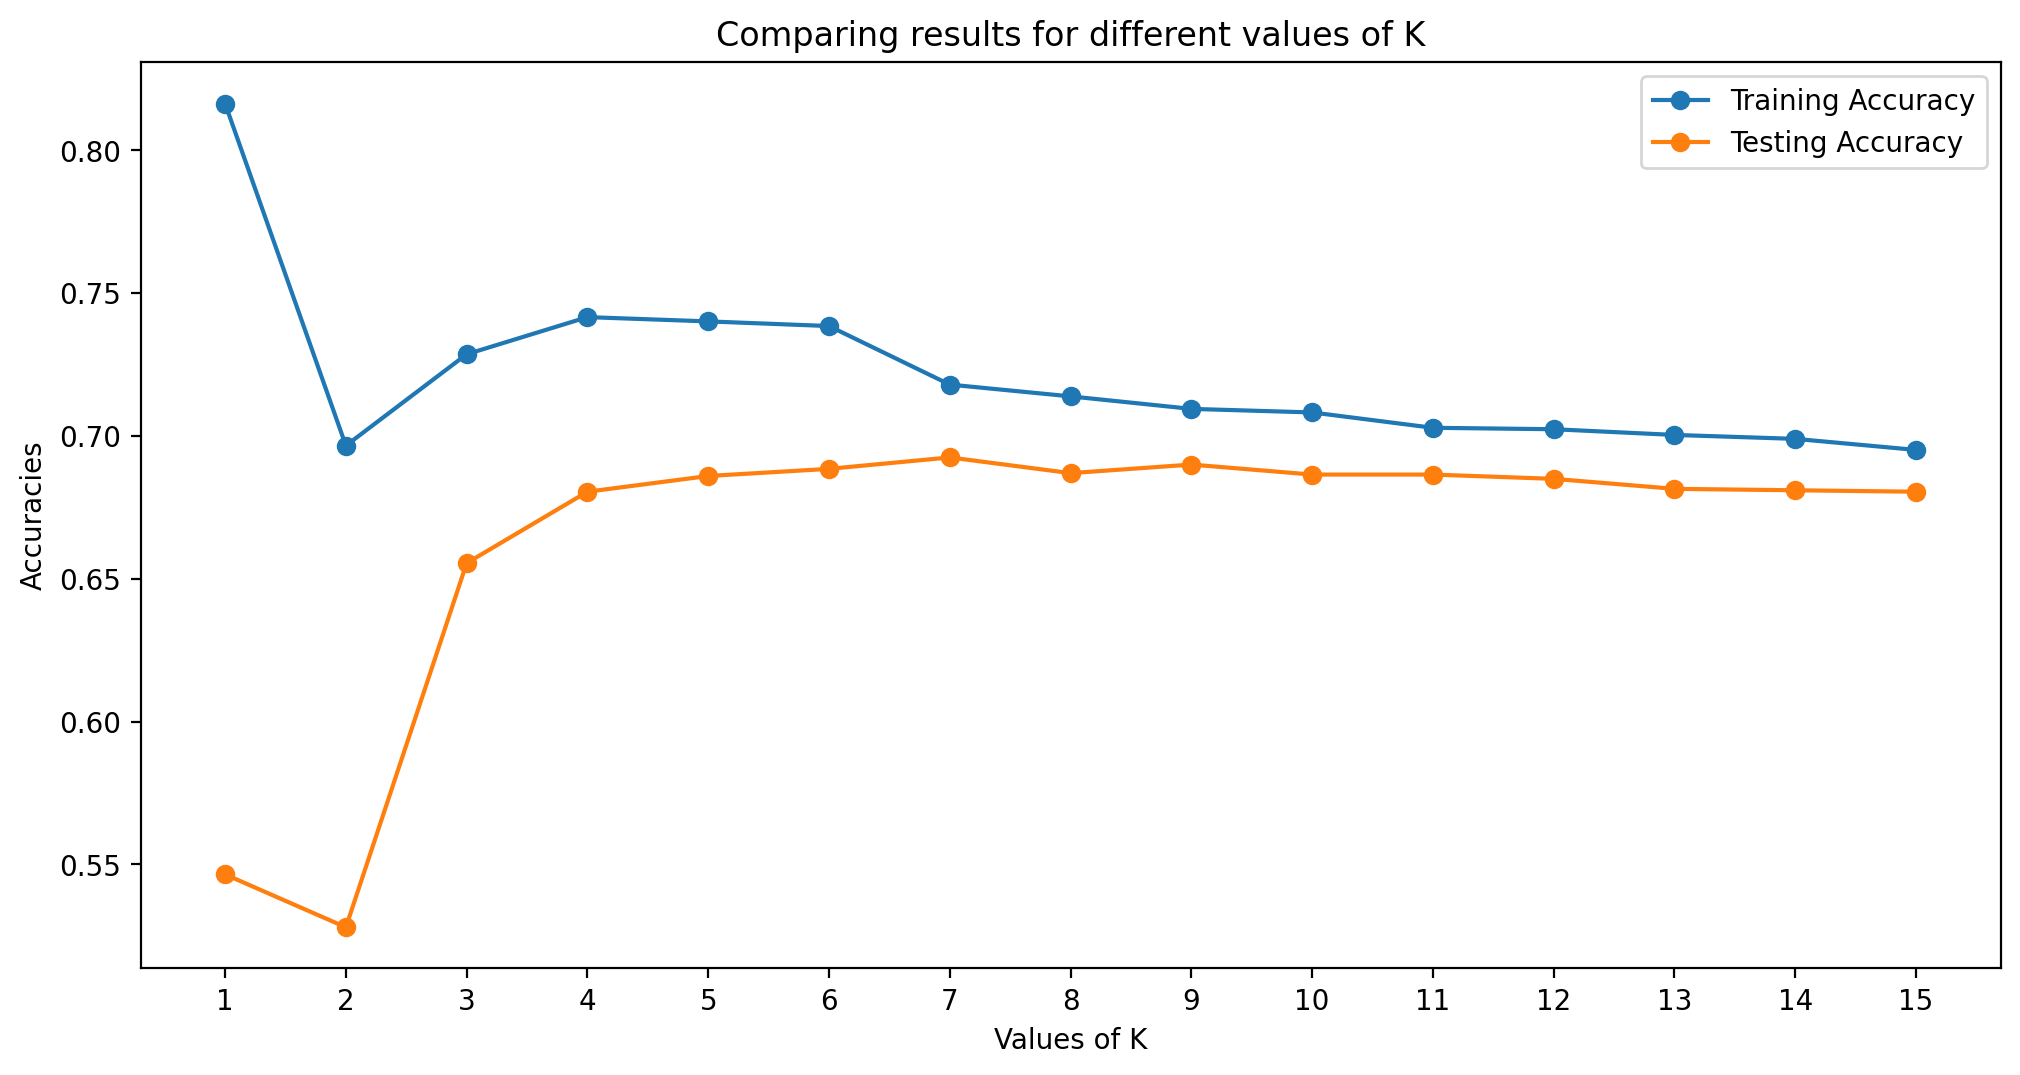

In [ ]:
import matplotlib.pyplot as plt
x=list(range(1,16))
plt.figure(figsize=(12,6),dpi=200)
plt.plot(x,acc_train,'-o',label='Training Accuracy')
plt.plot(x,acc_test,'-o',label='Testing Accuracy')
plt.xticks(x)
plt.xlabel('Values of K')
plt.ylabel('Accuracies')
plt.title('Comparing results for different values of K')
plt.legend()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train,y_train)

y_pred_train=classifier.predict(X_train)
y_pred_test=classifier.predict(X_test)


print('Training accuracy',accuracy_score(y_train,y_pred_train))
print('Testing ACcuracy accuracy',accuracy_score(y_test,y_pred_test))

Training accuracy 0.702875
Testing ACcuracy accuracy 0.6865


# import Decision tree classifier model for classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion='entropy',max_depth=10)
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
y_pred_train=Classifier.predict(X_train)
y_pred_test=Classifier.predict(X_test)

In [ ]:
print('Training accuracy',accuracy_score(y_train,y_pred_train))
print('Training accuracy',accuracy_score(y_test,y_pred_test))

Training accuracy 0.721875
Training accuracy 0.683


# Import Random Forest classifier for classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10,max_depth=5,random_state=2)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)

In [ ]:
pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))


Training Accuracy :  0.62825
Testing  Accuracy :  0.615


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=2)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2)

In [ ]:
pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.649875
Testing  Accuracy :  0.6405


# Import XGBOOST classifier for classification

In [ ]:
from xgboost import XGBClassifier
xg_classifier=XGBClassifier(n_estimators=5)
xg_classifier.fit(X_train,y_train)

XGBClassifier(n_estimators=5, objective='multi:softprob')

In [ ]:
pred_train = xg_classifier.predict(X_train)
pred_test = xg_classifier.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.686625
Testing  Accuracy :  0.682


In [ ]:
xg_classifier=XGBClassifier(n_estimators=10)
xg_classifier.fit(X_train,y_train)
pred_train = xg_classifier.predict(X_train)
pred_test = xg_classifier.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.687
Testing  Accuracy :  0.682


# Import ADAXGBOOST classifier for classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad_classifier=AdaBoostClassifier(DecisionTreeClassifier(max_depth=6,max_features=50),n_estimators=20)
ad_classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         max_features=50),
                   n_estimators=20)

In [ ]:
pred_train = ad_classifier.predict(X_train)
pred_test = ad_classifier.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.706875
Testing  Accuracy :  0.679


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 50 kB/s 


Import CATBOOST classifier for classification

In [ ]:
from catboost import CatBoostClassifier
cat_classifier=CatBoostClassifier(n_estimators=5)
cat_classifier.fit(X_train,y_train)

Learning rate set to 0.5
0:	learn: 1.1246407	total: 213ms	remaining: 854ms
1:	learn: 1.0423071	total: 353ms	remaining: 529ms
2:	learn: 0.9913851	total: 474ms	remaining: 316ms
3:	learn: 0.9730546	total: 589ms	remaining: 147ms
4:	learn: 0.9627201	total: 740ms	remaining: 0us


In [ ]:
pred_train = cat_classifier.predict(X_train)
pred_test = cat_classifier.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

# Import VOTINGCLASSIFIER for Classification 

In [ ]:
from sklearn.ensemble import VotingClassifier
vt_classifier = VotingClassifier(estimators = [
                                ('rf', rf_classifier),
                                ('xg', xg_classifier),
                                ('ad', ad_classifier)], voting = 'hard')

vt_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=10,
                                                     random_state=2)),
                             ('xg',
                              XGBClassifier(n_estimators=5,
                                            objective='multi:softprob')),
                             ('ad',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                                       max_features=50),
                                                 n_estimators=20))])

In [ ]:
pred_train = vt_classifier.predict(X_train)
pred_test = vt_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.68925
Testing  Accuracy :  0.6845


In [ ]:
from xgboost import XGBClassifier
xgb_calssifier = XGBClassifier(random_state = 2)



In [ ]:
select_params={
    'n_estimators':[5,10,15,20],
    'max_depth':[3,4,6,8,10],
    'gamma':[0.01,0.05,0.001],
    'learning_rate':[0.001,0.01,0.1,1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator  = xgb_calssifier,
                           param_grid = select_params,
                           scoring    = ['r2'],
                           refit = 'r2',
                           cv = 5,
                           verbose = 3)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=5; r2: (test=-0.025) total time=  27.3s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=5; r2: (test=-0.095) total time=  22.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=5; r2: (test=-0.057) total time=  22.1s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=5; r2: (test=-0.092) total time=  24.6s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=5; r2: (test=-0.020) total time=  22.5s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=10; r2: (test=-0.025) total time=  40.2s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=10; r2: (test=-0.095) total time=  40.9s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=10; r2: (test=-0.057) total time=  40.5s
[CV 4/5] END gamma=0.01, learning_rat

KeyboardInterrupt: ignored